In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors
from datetime import datetime
from IPython.display import display

In [0]:
target_sentence = '''
to be or not to be that is the question. whether tis
nobler in the mind to suffer. the slings and arrows of
outrageous fortune. or to take arms against a sea of
troubles and by opposing end them. to die to sleep. no
more. and by a sleep to say we end. the heartache and
the thousand natural shocks.
'''
target_sentence = target_sentence.replace('\n',' ')
vocab = 'abcdefghijklmnopqrstuvwxyz .'

In [0]:
target_sentence = target_sentence.lower()
target_sentence = pd.Series([c for c in list(target_sentence)])

vocab_sentence = vocab.lower()
vocab_sentence = pd.Series([c for c in list(vocab_sentence)])

idx_to_chars = pd.Series(vocab_sentence.unique())
chars_to_idx = pd.Series(index=idx_to_chars, data=idx_to_chars.index)
chars_range = len(idx_to_chars)
length_of_text = len(target_sentence)

print(f"Text length: {length_of_text}")
print(f"Vocabulary length: {len(chars_to_idx)}")
print("")
print("Vocabulary:")
for k in range(chars_range):
  print(f"[{k:>3}]\t{idx_to_chars[k]}")

Text length: 300
Vocabulary length: 28

Vocabulary:
[  0]	a
[  1]	b
[  2]	c
[  3]	d
[  4]	e
[  5]	f
[  6]	g
[  7]	h
[  8]	i
[  9]	j
[ 10]	k
[ 11]	l
[ 12]	m
[ 13]	n
[ 14]	o
[ 15]	p
[ 16]	q
[ 17]	r
[ 18]	s
[ 19]	t
[ 20]	u
[ 21]	v
[ 22]	w
[ 23]	x
[ 24]	y
[ 25]	z
[ 26]	 
[ 27]	.


# Functions

Chromosome evaluation functions

In [0]:
def chromosome_to_text(c, idx_to_chars):
    s = c.apply(lambda ct: idx_to_chars[ct])
    return s


def text_to_chromosome(s, chars_to_idx):
    c = s.apply(lambda st: chars_to_idx[st])
    return c


def generate_random_chromosome(length_of_text, chars_range):
    c = pd.Series(np.random.randint(0, chars_range, length_of_text))
    return c

def get_matches(c, target_chromosome,chars_range=None):
    matches = c == target_chromosome
    fitness = matches.sum()
    return fitness


def get_euclidian_distance(c, target_chromosome, chars_range):
    max_possible_score = chars_range * c.shape[0]
    total = np.abs(c - target_chromosome).sum()
    fitness = max_possible_score - total
    return fitness


fitness_function = get_matches

chromosome mating functions

In [0]:
def uniform_mate(c1, c2, chars_range, mutation_rate=None, crossover_rate=None):
    chromosome_size = c1.shape[0]

    if mutation_rate is None:
        mutation_rate = 1.0 / float(chromosome_size)
    if crossover_rate is None:
        crossover_rate = 1.0 / float(chromosome_size)

    # Cross over
    do_crossover = np.random.random() <= crossover_rate
    if do_crossover:
        mate_map = np.random.choice([0, 1], size=chromosome_size)
        cx = (mate_map * c1) + (1 - mate_map) * c2

        mate_map = np.random.choice([0, 1], size=chromosome_size)
        cy = (mate_map * c1) + (1 - mate_map) * c2
    else:
        cx = c1.copy()
        cy = c2.copy()

    
    # Mutations
    cx_mutation_map = np.random.choice([0, 1], p=[1 - mutation_rate, mutation_rate], size=chromosome_size)
    cx_mutations = np.random.randint(0, chars_range, size=chromosome_size)
    cx = (cx * (1 - cx_mutation_map)) + (cx_mutations * cx_mutation_map)

    cy_mutation_map = np.random.choice([0, 1], p=[1 - mutation_rate, mutation_rate], size=chromosome_size)
    cy_mutations = np.random.randint(0, chars_range, size=chromosome_size)
    cy = (cy * (1 - cy_mutation_map)) + (cy_mutations * cy_mutation_map)

    return cx, cy

# Evolution loop

constants and hyperparameters

In [0]:
# Attempt 1 - 14:08 minutes
# mutation_rate = 3 * 1.0 / length_of_text
# print("Mutation rate: {}".format(mutation_rate))
# crossover_rate = 0.8
# number_of_generations = 10000
# population_size = 400
# extinction = 50
# population = list()
# elitism = 10


# Attempt 2 - 22 seconds minutes
# mutation_rate = 3 * 1.0 / length_of_text
# print("Mutation rate: {}".format(mutation_rate))
# crossover_rate = 0.8
# number_of_generations = 10000
# population_size = 400
# extinction = 300
# population = list()
# elitism = 10


# Attemp 3 - 21 seconds.
# mutation_rate = 3 * 1.0 / length_of_text
# print("Mutation rate: {}".format(mutation_rate))
# crossover_rate = 0.95
# number_of_generations = 10000
# population_size = 400
# extinction = 300
# population = list()
# elitism = 50


# Attempt 4 - 25 seconds.
# mutation_rate = 3 * 1.0 / length_of_text
# print("Mutation rate: {}".format(mutation_rate))
# crossover_rate = 0.7
# number_of_generations = 10000
# population_size = 400
# extinction = 300
# population = list()
# elitism = 50


# Attempt 5 - 3:48 minutes.
# mutation_rate = 8 * 1.0 / length_of_text
# print("Mutation rate: {}".format(mutation_rate))
# crossover_rate = 0.8
# number_of_generations = 10000
# population_size = 400
# extinction = 300
# population = list()
# elitism = 50


# Attempt 6 - 29 seconds.
# mutation_rate = 1 * 1.0 / length_of_text
# print("Mutation rate: {}".format(mutation_rate))
# crossover_rate = 0.8
# number_of_generations = 10000
# population_size = 400
# extinction = 300
# population = list()
# elitism = 50


# Attempt 7 - 18 seconds.
mutation_rate = 3 * 1.0 / length_of_text
print("Mutation rate: {}".format(mutation_rate))
crossover_rate = 0.87
number_of_generations = 10000
population_size = 400
extinction = 300
population = list()
elitism = 10

Mutation rate: 0.01


In [0]:
population = list()
statistics_df = pd.DataFrame(index=range(number_of_generations), columns=range(population_size))
top_runner = pd.DataFrame(index=range(number_of_generations), columns=range(length_of_text))
target_chromosome = text_to_chromosome(target_sentence, chars_to_idx)
target_chromosome_as_np = target_chromosome.to_numpy()

for chromosome_idx in range(population_size):
    c = generate_random_chromosome(length_of_text, chars_range)
    population.append(c)

In [0]:
# Each Row is a chromosome in "population"
population = np.array(population, dtype=np.float)
start_time = datetime.now()
for gen_idx in range(number_of_generations):
    scores = np.sum(population == target_chromosome_as_np, axis=1)
    population_with_scores = np.column_stack((population, scores))
    population_with_scores = population_with_scores[(-population_with_scores)[:, -1].argsort()]

    # Gather statistics
    statistics_df.loc[gen_idx] = scores
    current_top_runner = population_with_scores[0, :-1]
    current_top_runner_matches = get_matches(current_top_runner, target_chromosome)
    current_top_runner_score = scores.max()
    top_possible_matches = get_matches(target_chromosome, target_chromosome)
    top_possible_score = fitness_function(target_chromosome, target_chromosome, chars_range)
    top_runner.loc[gen_idx] = current_top_runner
    current_time = datetime.now() - start_time

    msg = f""
    msg += f"[{current_time}][Gen: {gen_idx + 1:>3} / {number_of_generations}]\t"
    msg += f"Average: {scores.mean():>.4f}\t"
    msg += f"std: {scores.std():>.3f}\t"
    msg += f"Best: {current_top_runner_score} / {top_possible_score} ({current_top_runner_score / top_possible_score:>.3f})\t"
    msg += f"Top matches: {current_top_runner_matches} / {top_possible_matches}"
    print(msg)

    if current_top_runner_matches == top_possible_matches:
        print("Problem solved. breaking")
        statistics_df = statistics_df.dropna(axis=0)
        top_runner = top_runner.dropna(axis=0)
        break

    # Normalize scores
    max_collisions = length_of_text
    population_with_scores[:, -1] = (population_with_scores[:, -1] / max_collisions)

    # repopulate after killing chromosomes
    offsprings_to_generate = population_size
    offsprings = np.zeros([offsprings_to_generate, population_with_scores.shape[1]])

    # Apply elitism
    offsprings[:elitism] = population_with_scores[:elitism]

    # Apply extinction
    if extinction > 0:
      population_with_scores = population_with_scores[:-extinction]
      population_with_scores[:, -1] = population_with_scores[:, -1] / population_with_scores[:, -1].sum()

    for offspring_idx in range(elitism, offsprings_to_generate, 2):
        p = population_with_scores[:, -1]
        parents_idxes = list(range(len(p)))
        parents_idx = np.random.choice(parents_idxes, size=2, p=p, replace=False)
        p1, p2 = population_with_scores[parents_idx, :-1]
        cx, cy = uniform_mate(p1, p2, chars_range, mutation_rate=mutation_rate, crossover_rate=crossover_rate)

        cx = np.append(cx, [0])  # Added score to match shape
        cy = np.append(cy, [0])  # Added score to match shape

        offsprings[offspring_idx] = cx
        offsprings[offspring_idx + 1] = cy

    # Join offsprings to general population
    population = offsprings
    population = population[:, :-1]


[0:00:00.003146][Gen:   1 / 10000]	Average: 10.7300	std: 3.005	Best: 22 / 300 (0.073)	Top matches: 22 / 300
[0:00:00.077002][Gen:   2 / 10000]	Average: 15.8700	std: 2.874	Best: 24 / 300 (0.080)	Top matches: 24 / 300
[0:00:00.150765][Gen:   3 / 10000]	Average: 20.5425	std: 3.045	Best: 31 / 300 (0.103)	Top matches: 31 / 300
[0:00:00.231579][Gen:   4 / 10000]	Average: 25.3575	std: 3.352	Best: 37 / 300 (0.123)	Top matches: 37 / 300
[0:00:00.307477][Gen:   5 / 10000]	Average: 30.8225	std: 3.415	Best: 43 / 300 (0.143)	Top matches: 43 / 300
[0:00:00.386340][Gen:   6 / 10000]	Average: 36.3650	std: 3.631	Best: 49 / 300 (0.163)	Top matches: 49 / 300
[0:00:00.467783][Gen:   7 / 10000]	Average: 41.6550	std: 4.083	Best: 56 / 300 (0.187)	Top matches: 56 / 300
[0:00:00.544829][Gen:   8 / 10000]	Average: 47.7950	std: 4.109	Best: 59 / 300 (0.197)	Top matches: 59 / 300
[0:00:00.627577][Gen:   9 / 10000]	Average: 53.9650	std: 3.973	Best: 67 / 300 (0.223)	Top matches: 67 / 300
[0:00:00.714605][Gen:  10 / 

# Results analysis and visualization

best and average score of each generation

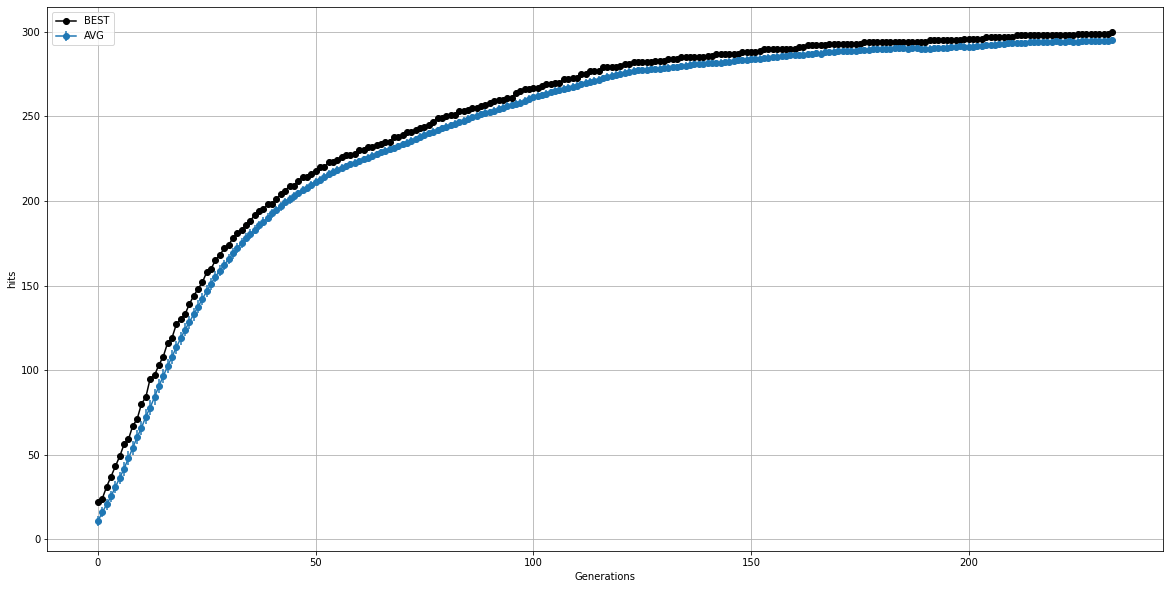

In [0]:
std = statistics_df.std(axis=1)
avg = statistics_df.mean(axis=1)
best = statistics_df.max(axis=1)

plt.figure(figsize=(20,10))
plt.errorbar(avg.index,avg, yerr=std, fmt='-o',label='AVG')
# plt.plot(avg.index,avg, '-o',label='AVG')
plt.plot(best,'-o',label='BEST',  color='black')
plt.grid()
plt.legend()
plt.xlabel('Generations')
plt.ylabel('hits')
_ = plt.plot()


best and average score of each generation on LOG scale

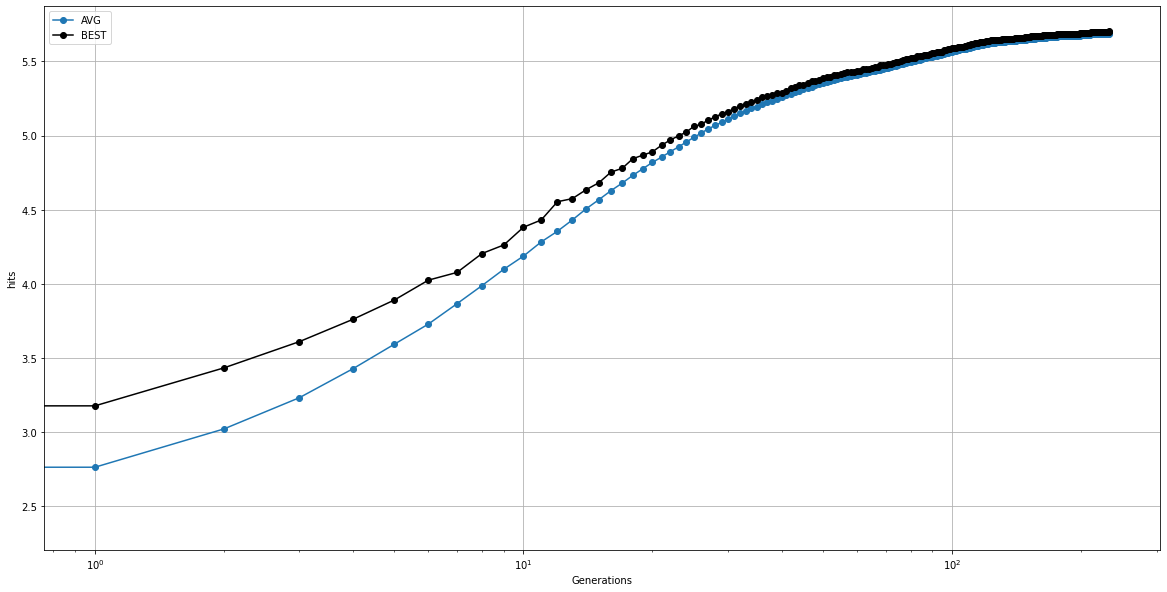

In [0]:
std = np.log(statistics_df.std(axis=1))
avg = np.log(statistics_df.mean(axis=1))
best = np.log(statistics_df.max(axis=1))

plt.figure(figsize=(20,10))
# plt.errorbar(avg.index,avg, yerr=std, fmt='-o',label='AVG')
plt.plot(avg.index,avg,'-o',label='AVG')
plt.plot(best,'-o',label='BEST',  color='black')
plt.grid()
plt.legend()
plt.xscale('log')
plt.xlabel('Generations')
plt.ylabel('hits')
_ = plt.plot()

Visualization of the winner (distance of each character from the true character)

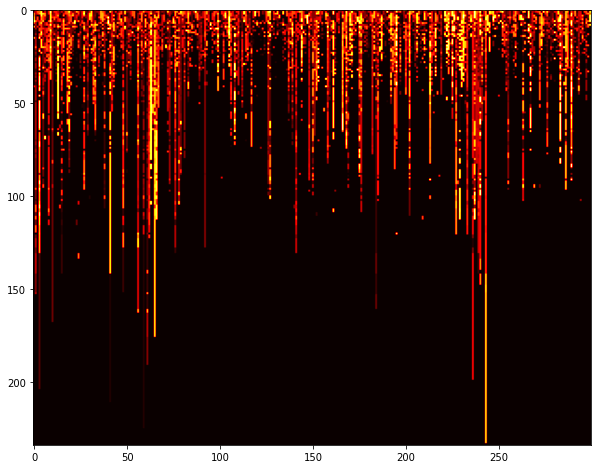

In [0]:
import matplotlib as m

d = top_runner - target_chromosome
d = np.abs(d)
d = d.astype(float)
d = d/ (d.max().max())
fig, ax = plt.subplots(figsize=(10,50))
_ = ax.imshow(d, cmap='hot')

Visualization of the winner (HIT/NO HIT on each character) 

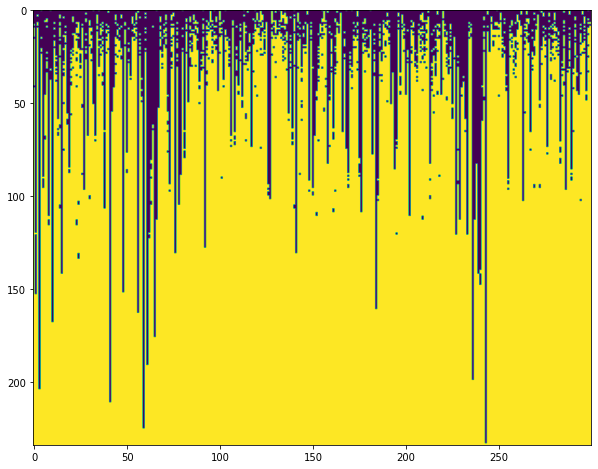

In [0]:
d = top_runner == target_chromosome
fig, ax = plt.subplots(figsize=(10,50))
_ = ax.imshow(d)